# Stock Price Prediction Model

### Import Packages

In [1]:
# Install yfinance (Yahoo Finance market data downloader) 
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Import external packages
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

### Observations - Extract Data from Yahoo Finance

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

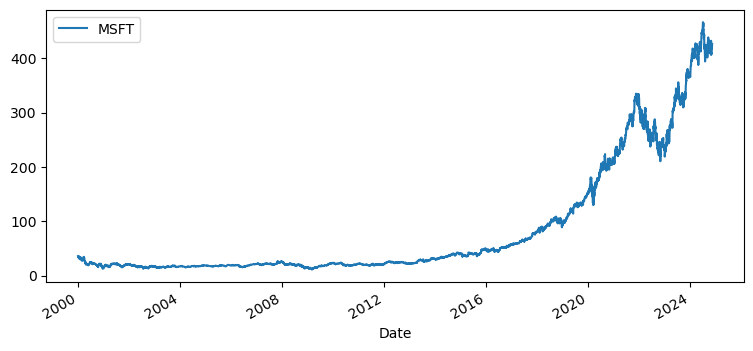

In [23]:
# Extract data from Yahoo Finance
ticker = 'MSFT'
stock_data = pd.DataFrame()
stock_data[ticker] = yf.download(ticker, start = '2000-01-01', end = '2024-12-31')['Adj Close']

# Plot MSFT closing prices
stock_data.plot(figsize=(9,4))

### Distributions - Calculate Historical Returns and Statistical Measures

<Axes: ylabel='Density'>

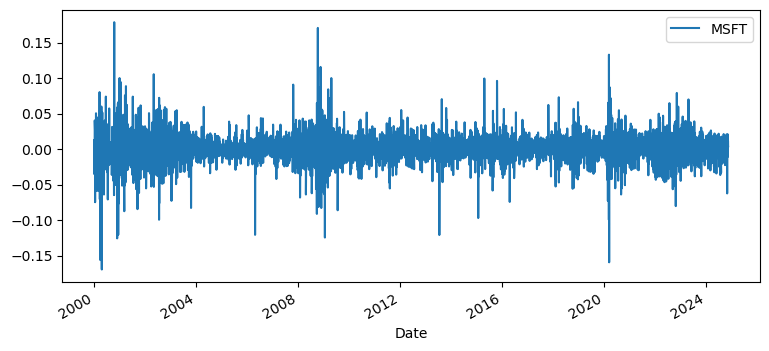

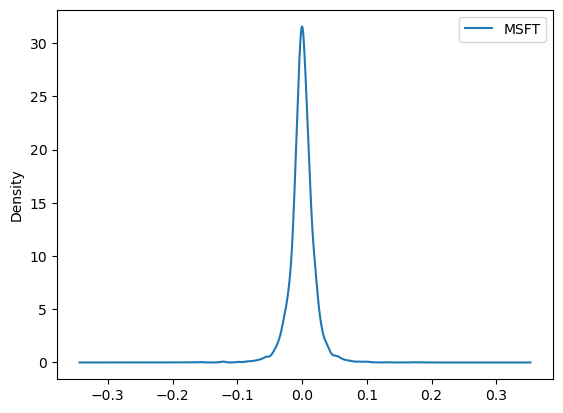

In [24]:
# Calculate historical log returns
log_returns = np.log(1 + stock_data.pct_change())

# Show all the log returns
log_returns.plot(figsize = (9,4))

# Show the distribution of the log returns
log_returns.plot.density()

In [25]:
# Calculate key statistic measures
mean = log_returns.mean()
variance = log_returns.var()
STD = log_returns.std()

### Simulations - Simulate Future Daily Returns and Future Prices

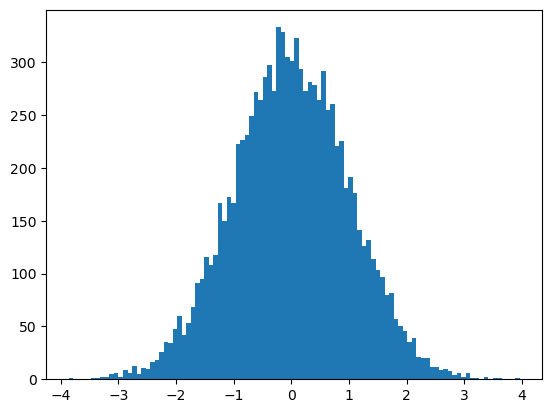

In [26]:
# How to generate 10,000 random numbers betwen 0 and 1.
random_numbes = np.random.rand(10000)

# Use those randomly generated numbers to sample from a normal distribution
# norm.ppf: percent point function
normal_random_numbers = norm.ppf(random_numbes)

# Plot each of the 10,000 randombly generated numbers from the normal distribution
plt.hist(normal_random_numbers,bins = 100);

In [27]:
# Simulate future daily returns using the above method
t_intervals = 250
simulations = 10000

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_simplereturns_simulated = np.exp(daily_logreturns_simulated)
daily_simplereturns_simulated.shape

(250, 10000)

In [28]:
# Using returns, calculate future price progression in each simulation

# Latest known stock price for MSFT
last_price = stock_data.iloc[-1]

# Prepare an array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated)

# Set the first row to the starting stock price
price_list[0] = last_price
price_list

array([[426.89001465, 426.89001465, 426.89001465, ..., 426.89001465,
        426.89001465, 426.89001465],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

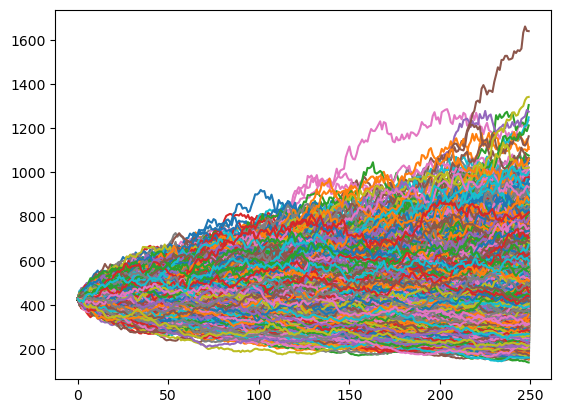

In [29]:
# Apply a for loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_simplereturns_simulated[t]

# Plot simulated future MSFT prices
plt.plot(price_list);

### Including Drift

In [33]:
# Calculate drift
drift = mean - (0.5 * variance)


# Simulate future daily returns
t_intervals = 250
simulations = 10000

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_logreturns_simulated_withdrift = daily_logreturns_simulated + drift.values
daily_simplereturns_simulated_withdrift = np.exp(daily_logreturns_simulated_withdrift)

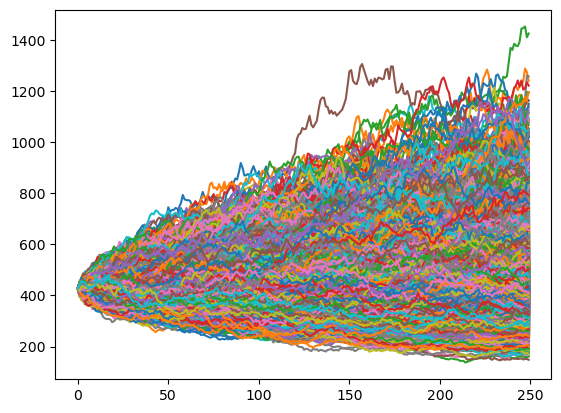

In [34]:
# Create a variable for the latest price of MSFT
last_price_withdrift = stock_data.iloc[-1]

# Prepare an array for the price simulations
price_list_withdrift = np.zeros_like(daily_simplereturns_simulated_withdrift)

# Set the first row to the starting stock price
price_list_withdrift[0] = last_price_withdrift

# Apply a for loop for simulated prices
for t in range(1, t_intervals):
    price_list_withdrift[t] = price_list_withdrift[t-1] * daily_simplereturns_simulated_withdrift[t]

# Plot simulated future MSFT prices
plt.plot(price_list_withdrift);

### Quantifications - Examine the worst, average, best scenarios and the probability distribution

In [43]:
# Calculate worst, avg and best scenarios
WorstSim = round(price_list[-1].min(), 2)
AvgSim = round(price_list[-1].mean(),2)
BestSim = round(price_list[-1].max(),2)

# Examine the worst, average, and best stock price sceanrios
print('Best and Worst Cases')
print(f'Worst Simulation $/share: {WorstSim}')
print(f'Average Simulation $/share: {AvgSim}')
print(f'Best Simulation $/share: {BestSim}')

# Set up confidence intervals
Mean_Day250Prices = price_list[-1].mean()
Stdv_Day250Prices = price_list[-1].std()

UpperInterval_1Stdv = Mean_Day250Prices + 1 * Stdv_Day250Prices
LowerInterval_1Stdv = Mean_Day250Prices - 1 * Stdv_Day250Prices

UpperInterval_2Stdv = Mean_Day250Prices + 2 * Stdv_Day250Prices
LowerInterval_2Stdv = Mean_Day250Prices - 2 * Stdv_Day250Prices
# Print out the price range within the confidence intervals
print('\n' + 'Confident Intervals')
print(f'1 Sigma: 68% confident that price after 250 days will fall between: ${round(LowerInterval_1Stdv,2)} and ${round(UpperInterval_1Stdv,2)}')
print(f'2 Sigma: 95% confident that price after 250 days will fall between: ${round(LowerInterval_2Stdv,2)} and ${round(UpperInterval_2Stdv,2)}')

Best and Worst Cases
Worst Simulation $/share: 138.55
Average Simulation $/share: 447.19
Best Simulation $/share: 1640.67

Confident Intervals
1 Sigma: 68% confident that price after 250 days will fall between: $309.11 and $585.28
2 Sigma: 95% confident that price after 250 days will fall between: $171.02 and $723.37
